In [54]:
import os, sys
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import subprocess

In [55]:
folder = '/usr/local/serenceslab/Doreti/FUNC/DF/PreProc/AFNI'
file = 'sfaout_polar+orig'

im = nib.load(os.path.join(folder, file+'.BRIK'))

dat = np.array(im.get_fdata())
dat.shape

(80, 80, 88, 14)

In [77]:
file_orig = os.path.join(folder, file)
file_new = os.path.join(folder, 'polar_phz_adj_MMH')
expr = "'a/2/pi*360 + 180'"
a = "'%s[13]'"%file_orig

cmd = '3dcalc -a %s -expr %s -prefix %s'%(a, expr, file_new)
print(cmd)
err = subprocess.call(cmd, shell=True)

3dcalc -a '/usr/local/serenceslab/Doreti/FUNC/DF/PreProc/AFNI/sfaout_polar+orig[13]' -expr 'a/2/pi*360 + 180' -prefix /usr/local/serenceslab/Doreti/FUNC/DF/PreProc/AFNI/polar_phz_adj_MMH


In [79]:
im = nib.load(file_new + '+orig.BRIK')
print(file_new + '+orig.BRIK')
dat = np.array(im.get_fdata())
dat.shape

/usr/local/serenceslab/Doreti/FUNC/DF/PreProc/AFNI/polar_phz_adj_MMH+orig.BRIK


(80, 80, 88, 14)

0.023463521152734756 359.96954345703125 180.0


(array([  2264.,   2504.,   3081.,   4431.,   5970., 533350.,   3538.,
          3363.,   2582.,   2117.]),
 array([2.34635212e-02, 3.60180715e+01, 7.20126795e+01, 1.08007288e+02,
        1.44001895e+02, 1.79996503e+02, 2.15991111e+02, 2.51985719e+02,
        2.87980327e+02, 3.23974935e+02, 3.59969543e+02]),
 <BarContainer object of 10 artists>)

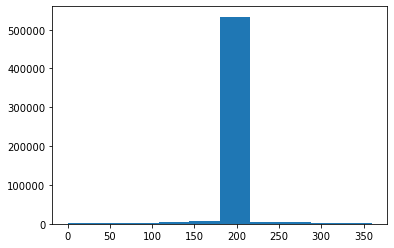

In [66]:
vals =dat[:,:,:,13]

vals = vals[vals>0]

print(np.min(vals), np.max(vals), np.median(vals))

plt.figure()
plt.hist(vals.ravel())

In [32]:
phz = dat[:,:,:,9]
sigphz = dat[:,:,:,13]

(array([  2264.,   2504.,   3081.,   4431.,   5970., 533350.,   3538.,
          3363.,   2582.,   2117.]),
 array([-3.14118314e+00, -2.51295874e+00, -1.88473434e+00, -1.25650995e+00,
        -6.28285551e-01, -6.11543655e-05,  6.28163242e-01,  1.25638764e+00,
         1.88461204e+00,  2.51283643e+00,  3.14106083e+00]),
 <BarContainer object of 10 artists>)

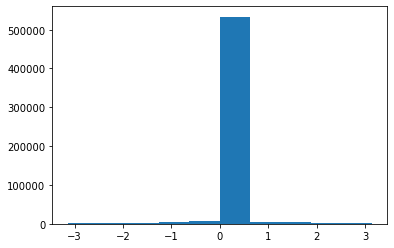

In [33]:

vals = sigphz

plt.figure()
plt.hist(vals.ravel())

(array([ 36433.,  37240.,  39761.,  43228., 205684.,  46809.,  41820.,
         38994.,  36807.,  36424.]),
 array([-3.14148688e+00, -2.51317940e+00, -1.88487191e+00, -1.25656443e+00,
        -6.28256941e-01,  5.05447388e-05,  6.28358030e-01,  1.25666552e+00,
         1.88497300e+00,  2.51328049e+00,  3.14158797e+00]),
 <BarContainer object of 10 artists>)

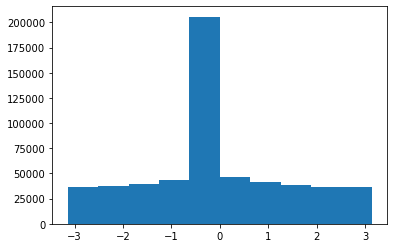

In [34]:
vals = phz

plt.figure()
plt.hist(vals.ravel())

0.023463521031828805 359.96952870487974 176.71195034865045


(array([2264., 2504., 3081., 4431., 5970., 5303., 3538., 3363., 2582.,
        2117.]),
 array([2.34635210e-02, 3.60180700e+01, 7.20126766e+01, 1.08007283e+02,
        1.44001890e+02, 1.79996496e+02, 2.15991103e+02, 2.51985709e+02,
        2.87980316e+02, 3.23974922e+02, 3.59969529e+02]),
 <BarContainer object of 10 artists>)

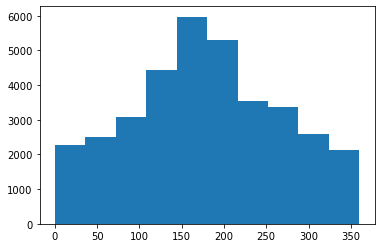

In [35]:
phz_adj = phz/2/np.pi*360 + 180

phz_adj[sigphz==0] = -1

vals = phz_adj[phz_adj>0]

print(np.min(vals), np.max(vals), np.median(vals))

plt.figure()
plt.hist(vals.ravel())

In [27]:
phz_adj.shape

(80, 80, 88)

In [51]:
# newfile = os.path.join(folder, 'polar_phz_adj_MMH.nii')
newfile = os.path.join(folder, 'polar_phz_adj_MMH.BRIK')

In [52]:
im_new = nib.Nifti1Image(phz_adj[:,:,:,None], im.affine, im.header)
print(newfile)
nib.save(im_new, newfile)

/usr/local/serenceslab/Doreti/FUNC/DF/PreProc/AFNI/polar_phz_adj_MMH+orig.BRIK


ImageFileError: Cannot work out file type of "/usr/local/serenceslab/Doreti/FUNC/DF/PreProc/AFNI/polar_phz_adj_MMH+orig.BRIK"

In [46]:
print(newfile)
d = np.array(nib.load(newfile).get_fdata())
d.shape

/usr/local/serenceslab/Doreti/FUNC/DF/PreProc/AFNI/polar_phz_adj_MMH.nii


(80, 80, 88, 1)

In [7]:
for ii in range(14):

    vals = dat[:,:,:,ii]

    print(ii)
    print(np.min(vals), np.max(vals), np.mean(vals))

0
-323.00518798828125 322.2270202636719 0.013295419244046128
1
-321.7591857910156 319.6065979003906 0.024798276349058557
2
-311.0416259765625 313.04876708984375 0.06640800584474087
3
0.0 9478.8662109375 6.932396966342379
4
-70.02216339111328 77.32960510253906 -0.0008574184684112726
5
-73.30111694335938 96.70494079589844 0.09492697588288701
6
2.8382081985473633 100000.0 28111.879152650647
7
-23528.388671875 24168.87109375 17.61467885859723
8
-21287.20703125 33735.38671875 1.1835838914472785
9
-3.141486883163452 3.141587972640991 -0.007116027893804517
10
-250.85110473632812 11208.1123046875 470.06506581277057
11
-5.29074441146804e-07 6.255195330595598e-07 -4.164622631097846e-11
12
0.0 41499.5234375 119.5767014643399
13
-3.1411831378936768 3.1410608291625977 -0.0015595467127350173
